# Survival Prediction for Titanic Dataset

**This notebook is to predict survival classes from the famous titanic dataset. It presents exploratory data analysis and visualization as well as predictive modeling with different classification algorithms including neural network. Finally, it also shows how to build a simple yet powerful pipeline.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/train-cleaned/train_cleaned.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


**Loading the dataset**

In [2]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')     

# **Exploratory Data Analysis and Visualization**

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(train.shape, test.shape)

(891, 12) (418, 11)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['survived','dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

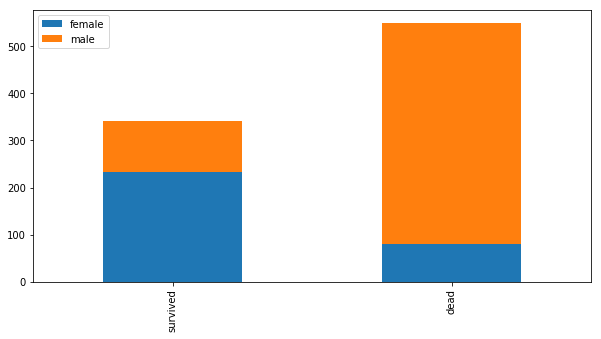

In [12]:
bar_chart('Sex')

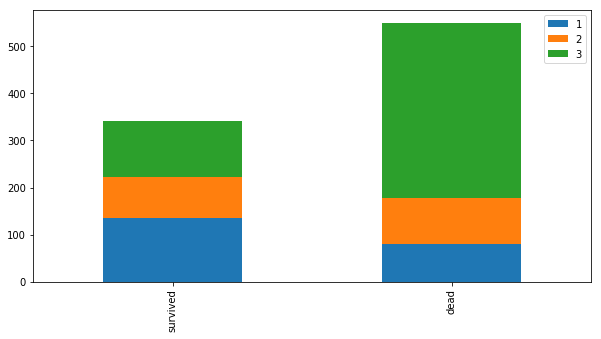

In [13]:
bar_chart('Pclass')

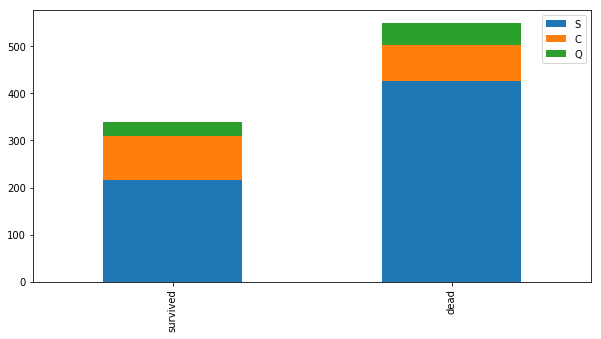

In [14]:
bar_chart('Embarked')

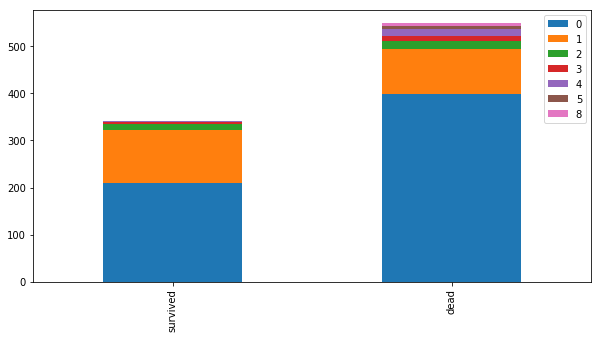

In [15]:
bar_chart('SibSp')

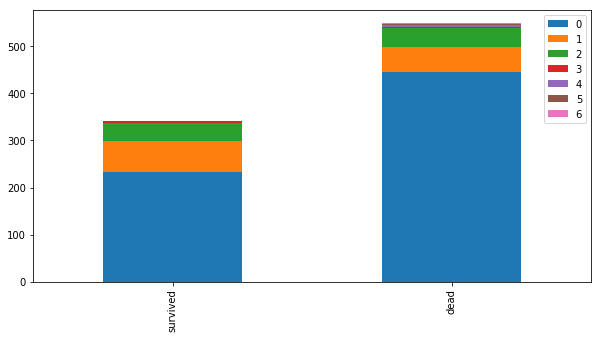

In [16]:
bar_chart('Parch')

**Feature Engineering**

In [17]:
train['Age'].fillna(train['Age'].mean(),inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)
train['Embarked'].fillna(value='S',inplace=True)

In [18]:
train['family']=train['SibSp']+train['Parch']+1
test['family']=test['SibSp']+train['Parch']+1

In [19]:
train['Sex'] = train['Sex'].replace(['female','male'],[0,1])
train['Embarked'] = train['Embarked'].replace(['S','Q','C'],[1,2,3])

In [20]:
test['Sex'] = test['Sex'].replace(['female','male'],[0,1])
test['Embarked'] = test['Embarked'].replace(['S','Q','C'],[1,2,3])

In [21]:
train_clean=train.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Cabin'])
test_clean=test.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Cabin'])

# Predictive Modeling

**Logistic Regression**

In [22]:
X_train=train_clean.drop(columns=['Survived'])
y_train=train_clean[['Survived']]

In [23]:
from sklearn.preprocessing import StandardScaler
X_train_scale=StandardScaler().fit_transform(X_train)
pd.DataFrame(X_train_scale).head()

,0,1,2,3,4,5
0,0.827377,0.737695,-0.592481,-0.502445,-0.585954,0.059160
1,-1.566107,-1.355574,0.638789,0.786845,1.942303,0.059160
2,0.827377,-1.355574,-0.284663,-0.488854,-0.585954,-0.560975
3,-1.566107,-1.355574,0.407926,0.420730,-0.585954,0.059160
4,0.827377,0.737695,0.407926,-0.486337,-0.585954,-0.560975


In [24]:

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression().fit(X_train_scale, y_train)
y_pred=LR.predict(test_clean)
from sklearn.metrics import classification_report
#print(classification_report(y_pred, gender_submission['Survived']))
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LogisticRegression(),X_train_scale,y_train,cv=5)
print(scores)
print(scores.mean())

[0.77094972 0.79329609 0.78651685 0.78651685 0.81355932]
0.7901677679909866


**Grid Search CV**

In [25]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
score=GridSearchCV(LogisticRegression(),grid).fit(X_train_scale, y_train)
print(score.best_params_)
print(score.best_score_)

{'C': 1.0, 'penalty': 'l2'}
0.792368125701459


**Submission File Preparation**

In [26]:
data = {'PassengerId':gender_submission['PassengerId'],
        'Survived':y_pred}
result=pd.DataFrame(data)
result.to_csv('/kaggle/working/result_lr.csv', index=False)
output=pd.read_csv('/kaggle/working/result_lr.csv')

**Random Forest Classifier**

In [27]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier().fit(X_train_scale, y_train)
y_pred_rf=RF.predict(test_clean)
from sklearn.metrics import classification_report
#print(classification_report(y_pred_rf, gender_submission['Survived']))
#print(y_pred_rf)
scores=cross_val_score(RandomForestClassifier(), X_train_scale, y_train, cv=5)
print(scores)
print(scores.mean())

[0.78212291 0.77094972 0.86516854 0.76966292 0.83615819]
0.8048124556925753


In [28]:
data={'PassengerId': gender_submission['PassengerId'],'Survived':y_pred_rf}
result_rf=pd.DataFrame(data)
result_rf.to_csv('/kaggle/working/result_rf.csv', index=False)
result_rf1=pd.read_csv('/kaggle/working/result_rf.csv')

**Support Vector Classifier**

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear', C=1)
scores=cross_val_score(svc, X_train_scale, y_train, cv=5)
print(scores)
print(scores.mean())

[0.80446927 0.80446927 0.78651685 0.75280899 0.78531073]
0.7867150249291879


In [30]:
y_pred_svc=SVC(kernel='linear', C=1).fit(X_train_scale, y_train).predict(test_clean)
data={'PassengerId': gender_submission['PassengerId'],'Survived':y_pred_svc}
result_svc=pd.DataFrame(data)
result_svc.to_csv('/kaggle/working/result_svc.csv', index=False)
result_svc=pd.read_csv('/kaggle/working/result_svc.csv')

**Stochastic Gradient Descent**

In [31]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
sgd=SGDClassifier()
scores=cross_val_score(sgd, X_train, y_train, cv=5)
print(scores)
print(scores.mean())

y_pred_sgd=SGDClassifier().fit(X_train, y_train).predict(test_clean)
data={'PassengerId': gender_submission['PassengerId'],'Survived':y_pred_sgd}
result_sgd=pd.DataFrame(data)
result_sgd.head()

result_sgd.to_csv('/kaggle/working/result_sgd.csv', index=False)
result_sgd=pd.read_csv('/kaggle/working/result_sgd.csv')
result_sgd.head()

[0.61452514 0.45810056 0.61797753 0.70786517 0.72316384]
0.6243264473522291


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


**Decision Tree Classifier**

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier()
scores=cross_val_score(dtc, X_train, y_train, cv=5)
print(scores)
print(scores.mean())

y_pred_dtc=DecisionTreeClassifier().fit(X_train, y_train).predict(test_clean)
data={'PassengerId': gender_submission['PassengerId'],'Survived':y_pred_dtc}
result_dtc=pd.DataFrame(data)
result_dtc.to_csv('/kaggle/working/result_dtc.csv', index=False)
result_dtc=pd.read_csv('/kaggle/working/result_dtc.csv')

[0.74860335 0.77653631 0.79775281 0.76404494 0.79661017]
0.7767095174209968


**Naive Bayes Classifier**

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
nb=GaussianNB()
scores=cross_val_score(nb, X_train, y_train, cv=5)
print(scores)
print(scores.mean())

y_pred_nb=GaussianNB().fit(X_train, y_train).predict(test_clean)
data={'PassengerId': gender_submission['PassengerId'],'Survived':y_pred_nb}
result_nb=pd.DataFrame(data)
result_nb.to_csv('/kaggle/working/result_nb.csv', index=False)
result_nb=pd.read_csv('/kaggle/working/result_nb.csv')

[0.73743017 0.7877095  0.78651685 0.82022472 0.81355932]
0.7890881119744151


**Neural Network**

In [34]:
import keras
import tensorflow as tf

Using TensorFlow backend.


In [35]:
model_nn=keras.Sequential([
    keras.layers.Dense(6,activation=tf.nn.relu, input_shape=[6]),
    keras.layers.Dense(8,activation=tf.nn.relu),
    keras.layers.Dense(1,activation='softmax')
    ])

In [36]:
#optimizer=tf.keras.optimizers.RMSprop(0.001)
model_nn.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])
model_nn.fit(X_train,y_train, epochs=5)

Epoch 1/5
891/891 [==============================] - 0s 354us/step - loss: 9.4478 - accuracy: 0.3838
Epoch 2/5
891/891 [==============================] - 0s 48us/step - loss: 9.4478 - accuracy: 0.3838
Epoch 3/5
891/891 [==============================] - 0s 44us/step - loss: 9.4478 - accuracy: 0.3838
Epoch 4/5
891/891 [==============================] - 0s 43us/step - loss: 9.4478 - accuracy: 0.3838
Epoch 5/5
891/891 [==============================] - 0s 44us/step - loss: 9.4478 - accuracy: 0.3838


In [37]:
y_pred_nn=model_nn.predict(test_clean).astype(int)

In [38]:
gender_submission['Survived']= y_pred_nn
gender_submission.to_csv('/kaggle/working/result_neural.csv', index=False)
result_nn=pd.read_csv('/kaggle/working/result_neural.csv')

**Simple Pipeline--Let's do it in a different way**

In [39]:
import time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

In [40]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')    

**Feature Engineering**

In [41]:
train['Title'] = train['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['FareBin'] = pd.qcut(train['Fare'], 4)
train['AgeBin'] = pd.qcut(train['Age'], 5)

test['Title'] = test['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['FareBin'] = pd.qcut(test['Fare'], 4)
test['AgeBin'] = pd.qcut(test['Age'], 5)

In [42]:
X_train=train.drop(columns=['Survived','Cabin','Fare','Age','PassengerId','Ticket','SibSp','Parch','Name'])
Y_train=train.Survived
X_test=test.drop(columns=['Cabin','Fare','Age','PassengerId','Ticket','SibSp','Parch','Name'])

In [43]:
num_feat=X_train.select_dtypes(include='number').columns.to_list()
cat_feat=X_train.select_dtypes(include='object').columns.to_list()

In [44]:
num_pipe=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

cat_pipe=Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('coder', OneHotEncoder(handle_unknown='ignore'))
])

ct=ColumnTransformer(remainder='drop',
    transformers=[
    ('numerical',num_pipe, num_feat),
    ('categorical',cat_pipe, cat_feat)
])

model_new=Pipeline([
    ('transformer', ct),
    ('predictor', RandomForestClassifier(n_jobs=1,random_state=0))
])

model_new.fit(X_train, Y_train);

In [45]:
print('Default model score: ', model_new.score(X_train, Y_train))

Default model score:  0.8484848484848485


In [46]:
y_pred_train=model_new.predict(X_train)
print('In sample Score: ', accuracy_score(y_pred_train, Y_train))

In sample Score:  0.8484848484848485


In [47]:
def submission(test, model):
    y_pred=model.predict(test)
    data={'PassengerId': gender_submission['PassengerId'],'Survived':y_pred}
    result=pd.DataFrame(data)
    #date=pd.Timestamp.now().strftime(format='%d_%m_%Y_%H-%M_')
    result.to_csv(f'/kaggle/working/pipeline_result.csv', index=False)

In [48]:
submission(X_test,model_new)

**Please upvote if you find this notebook useful, thank you.**